<a href="https://colab.research.google.com/github/kawin-j/DeepLearn-AI--Python/blob/Deep-learm-AI-ML/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow.python.platform.build_info as build
tf.__version__

'2.8.0'

In [2]:
import numpy as np
from matplotlib import pyplot as plt

import plotly
import plotly.graph_objs as go
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pickle as p

to_categorical = tf.keras.utils.to_categorical
mnist = tf.keras.datasets.mnist
laod_model = tf.keras.models.load_model
model_from_json = tf.keras.models.model_from_json

In [3]:
print(build.build_info['cuda_version'])
print(build.build_info["cudnn_version"])

11.1
8


In [4]:
print(f"Num GPUs Available: {len(tf.config.experimental.list_physical_devices('GPU'))}")
print(f"Defualt GPUs Device: {tf.test.gpu_device_name()}")

Num GPUs Available: 0
Defualt GPUs Device: 


In [5]:
batch_size =128
num_classes = 10
epochs = 5
img_rows, img_cols = 28,28

In [6]:
# MNIST datasets download
(xtrain,ytrain), (xtest, ytest)= mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [7]:
print(xtrain.shape, xtest.shape) # DaTASET DIMENSION

(60000, 28, 28) (10000, 28, 28)


In [8]:
ytrain[0:10] #solution

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

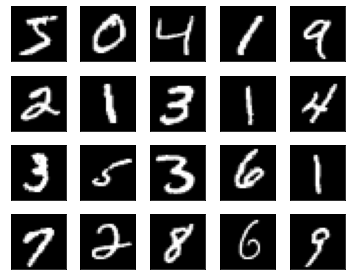

In [9]:
# Train dataset
plt.figure(figsize=(5,4))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(xtrain[i], cmap = 'gray')
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.savefig('train_mnist.png', dpi = 300)

In [10]:
#Maximum and minimum pixel
xtrain.min(), xtrain.max()

(0, 255)

In [11]:
temp_x_test = xtest

xtrain = xtrain.reshape(xtrain.shape[0],img_rows, img_cols,1)
xtest = xtest.reshape(xtest.shape[0],img_rows, img_cols,1)
input_shape =(img_rows, img_cols,1)

xtrain = xtrain.astype('float32')
xtest = xtest.astype('float32')
xtrain /=255
xtest /=255
print(f"xtrain shape: {xtrain.shape}\nxtest shape: {xtest.shape}\n{xtrain.min()} {xtrain.max()}")

xtrain shape: (60000, 28, 28, 1)
xtest shape: (10000, 28, 28, 1)
0.0 1.0


In [12]:
ytrain = to_categorical(ytrain,num_classes)
ytest = to_categorical(ytest,num_classes)

In [13]:
#Feature Extraction
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3), activation ='relu',input_shape = input_shape))
model.add(tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size =(2,2)))
model.add(tf.keras.layers.Dropout(0.25))

#Image classification
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation ='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(num_classes, activation = 'softmax'))

In [14]:
model.compile(optimizer= 'adam', loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [15]:
import time

In [16]:
start = time.time()

his = model.fit(xtrain, ytrain,batch_size= batch_size,epochs = epochs, verbose = 1, validation_data=(xtest,ytest))
done = time.time()
print(done - start)

Epoch 1/5
469/469 [==============================] - 146s 310ms/step - loss: 0.2473 - accuracy: 0.9245 - val_loss: 0.0584 - val_accuracy: 0.9803
Epoch 2/5
469/469 [==============================] - 144s 307ms/step - loss: 0.0857 - accuracy: 0.9741 - val_loss: 0.0401 - val_accuracy: 0.9870
Epoch 3/5
469/469 [==============================] - 145s 309ms/step - loss: 0.0638 - accuracy: 0.9809 - val_loss: 0.0375 - val_accuracy: 0.9883
Epoch 4/5
469/469 [==============================] - 144s 308ms/step - loss: 0.0541 - accuracy: 0.9831 - val_loss: 0.0331 - val_accuracy: 0.9898
Epoch 5/5
469/469 [==============================] - 150s 320ms/step - loss: 0.0464 - accuracy: 0.9853 - val_loss: 0.0296 - val_accuracy: 0.9908
742.750785112381


In [17]:
filepath_history_model = 'history_model'
with open(filepath_history_model, 'wb') as file:
    p.dump(his.history, file)

In [18]:
filepath = 'model.h5'
model.save(filepath)

In [19]:
filepath_model = 'model.json'
filepath_weights = 'weights_model.h5'
model_json = model.to_json()
with open(filepath_model, "w") as json_file:
    json_file.write(model_json)
    model.save_weights(filepath_weights)

In [20]:
with open(filepath_history_model, 'rb') as file:
    his = p.load(file)

In [22]:
h1 = go.Scatter(y = his['loss'], mode = "lines", line = dict(width = 2, color = 'blue'), name = "loss")
h2 = go.Scatter(y = his['val_loss'], mode = "lines", line = dict(width = 2, color = 'red'), name = "val_loss")
data = [h1,h2]
layout1 = go.Layout(title = 'Loss', xaxis= dict(title = 'epochs'), yaxis= dict(title = ''))
fig1 = go.Figure(data, layout = layout1)
plotly.offline.iplot(fig1, filename = "testMNIST")

In [27]:
predict_model = laod_model(filepath)
predict_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [30]:
with open(filepath_model,'r') as f:
  loaded_model_json = f.read()
  predict_model = model_from_json(loaded_model_json)
  predict_model.load_weights(filepath_weights)
predict_model.compile(optimizer= 'adam', loss='categorical_crossentropy',metrics=['accuracy'])
predict_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

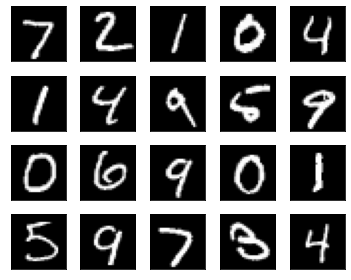

In [31]:
plt.figure(figsize = (5,4))
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.imshow(temp_x_test[i], cmap = 'gray')
  plt.xticks([])
  plt.yticks([])
plt.tight_layout()
plt.savefig('test_mnist.png',dpi = 300)

In [33]:
result = predict_model.predict(xtest[:1])
predict = np.argmax(result, axis = -1)
print(result)

[[2.7391389e-10 8.3213763e-08 1.5549477e-07 4.2516072e-06 1.2611001e-09
  2.1896084e-10 2.6875155e-11 9.9999440e-01 3.6100694e-09 1.0676816e-06]]


In [34]:
score = predict_model.evaluate(xtest, ytest, verbose = 0)
print(f"Test loss: {score[0]} \nTest accuracy: {score[1]}")

Test loss: 0.02959216944873333 
Test accuracy: 0.9908000230789185


In [35]:
predicted_classes = predict_model.predict(xtest)
predicted_classes = np.argmax(predicted_classes, axis= -1)
ytrue = np.argmax(ytest, axis= -1)
correct = np.nonzero(predicted_classes == ytrue)[0]
incorrect = np.nonzero(predicted_classes != ytrue)[0]

print("Correct predicted classes: ", correct.shape[0])
print("Incorrect predicted classes: ", incorrect.shape[0])

Correct predicted classes:  9908
Incorrect predicted classes:  92


In [36]:
confusion_matrix(ytrue, predicted_classes)

array([[ 976,    0,    0,    1,    0,    1,    1,    0,    1,    0],
       [   0, 1132,    2,    0,    0,    0,    1,    0,    0,    0],
       [   1,    1, 1026,    0,    0,    0,    0,    3,    1,    0],
       [   0,    0,    2, 1004,    0,    2,    0,    1,    1,    0],
       [   0,    0,    1,    0,  974,    0,    1,    0,    1,    5],
       [   2,    0,    0,    7,    0,  882,    1,    0,    0,    0],
       [   4,    2,    0,    0,    1,    1,  950,    0,    0,    0],
       [   0,    3,    9,    2,    0,    0,    0, 1013,    1,    0],
       [   2,    0,    2,    1,    0,    1,    1,    1,  964,    2],
       [   2,    1,    0,    1,    5,    5,    0,    3,    5,  987]])

In [39]:
labels = {0:"Zero", 1:"One",2:"Two",3:"Three",4:"Four",5:"Five",6:"Six",7:"Seven",8:"Eight",9:"Nine"}
target_names = [f"Class {x} ({labels[x]})" for x in range(num_classes)]
print(classification_report(ytrue, predicted_classes,target_names = target_names, digits = 4))

                 precision    recall  f1-score   support

 Class 0 (Zero)     0.9889    0.9959    0.9924       980
  Class 1 (One)     0.9939    0.9974    0.9956      1135
  Class 2 (Two)     0.9846    0.9942    0.9894      1032
Class 3 (Three)     0.9882    0.9941    0.9911      1010
 Class 4 (Four)     0.9939    0.9919    0.9929       982
 Class 5 (Five)     0.9888    0.9888    0.9888       892
  Class 6 (Six)     0.9948    0.9916    0.9932       958
Class 7 (Seven)     0.9922    0.9854    0.9888      1028
Class 8 (Eight)     0.9897    0.9897    0.9897       974
 Class 9 (Nine)     0.9930    0.9782    0.9855      1009

       accuracy                         0.9908     10000
      macro avg     0.9908    0.9907    0.9907     10000
   weighted avg     0.9908    0.9908    0.9908     10000

